<a href="https://colab.research.google.com/github/keyayeten/opt_drill_methods/blob/main/functions_of_many_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Вариант 7, Исаев
### Безусловная минимизация функций нескольких переменных


Дана вектор-функция F(x, y) =
{
F1(x, y); F2(x, y)}, а также параметр γ.
Требуется решить задачу минимизации
f(x, y) = γ^2F1^2(x, y) + F^22(x, y) → min, (x; y) ∈ R^2



7. F1 = y^2 − e^2x | F2 = x + y − 1 | γ = 10 | точка минимума = (0; 1) | начальные точки: (2; −2),(−2; −2)

In [188]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [189]:
# Задание функций

GAMMA = 10

def F1(x, y):
    return y**2 - np.exp(2*x)

def F2(x, y):
  return x + y -1

# Функция f1(x, y)
def f1(x, y):
    return (GAMMA ** 2) * (F1(x, y) ** 2) + (F2(x, y) ** 2)

# Градиент для первой функции
def analytic_grad1(x, y):
     # Аналитический градиент для функции f1
    g1 = 4 * (GAMMA**2) * F1(x, y) * x / ((x**2 + 1)**2) - 2 * F2(x, y)
    g2 = 2 * y * (2 * (GAMMA**2) * F1(x, y) + 1)
    return g1, g2


# Гессиан для первой функции
def analytic_hessian1(x, y):
    # Частные производные градиента функции f1
    dg1_dx = 4 * (GAMMA**2) * F1(x, y) * ((x**2+1)**2 - 8*x**2)/((x**2+1)**4)
    dg1_dy = 4 * (GAMMA**2) * F1(x, y) * y / (x**2+1)**2
    dg2_dx = 4 * (GAMMA**2) * y * F1(x, y) * ((x**2+1)**2 - 2*x**2) / ((x**2+1)**4)
    dg2_dy = 2 * (GAMMA**2) * F1(x, y) + 2
    
    # Аналитический гессиан для функции f1
    H = [
        [dg1_dx, dg1_dy],
        [dg2_dx, dg2_dy]
    ]

    return H[0][0], H[1][0], H[1][1]


def f2(x, y):
    return (GAMMA ** 2) * np.cosh(F1(x, y)) + np.cosh(F2(x, y))


def f3(x, y):
    return (GAMMA ** 2) * abs(F1(x, y)) + abs(F2(x, y))

In [190]:
# # Численное нахождение градиента и гессиана


def get_gradient(func, x, y, h):
    f = func(x, y)
    df_dx = (func(x+h, y) - f) / h
    df_dy = (func(x, y+h) - f) / h
    return df_dx, df_dy

def get_hessian(func, x, y, h):
    f = func(x, y)
    f_xx = func(x+2*h, y)
    f_xy = func(x+h, y+h)
    f_yy = func(x, y+2*h)
    f_yx = func(x+h, y)
    f_x = func(x, y+h)
    hes1 = (f_xx - 2 * f_yx + f) / h**2
    hes2 = (f_xy - f_yx - f_x + f) / h**2
    hes3 = (f_yy - 2 * f_x + f) / h**2
    return hes1, hes2, hes3

In [191]:
def make_grid_data(func_xy):
    # Строим сетку в интервале от -3.5 до 3.5, имеющую 100 отсчетов по обоим координатам
    x = np.linspace(-3.5, 3.5, 200)
    y = np.linspace(-3.5, 3.5, 200)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = np.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = func_xy(xgrid, ygrid)

    return xgrid, ygrid, z

  
def get_graph(f_xy, elev=None, azim=None, roll=None, slice=100):
    x, y, z = make_grid_data(f_xy)

    # Сеточный график
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    axes.view_init(elev=elev, azim=azim, roll=roll)
    axes.set_xlabel('$X$')
    axes.set_ylabel('$Y$')
    axes.set_zlabel('$Z$')
    axes.plot_surface(x, y, z, rstride=5, cstride=5, cmap='plasma')
    plt.show()
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(projection='3d')
    ax2.view_init(elev=elev, azim=azim, roll=roll)
    ax2.set_xlabel('$X$')
    ax2.set_ylabel('$Y$')
    ax2.set_zlabel('$Z$')
    z2 = (slice * x / x)
    z2 = [[z2[i][j] if z2[i][j] < z[i][j] else z[i][j] for j in range(len(z2[i]))] for i in range(len(z2))]
    z2 = np.array(z2, dtype=float)
    ax2.plot_surface(x, y, z2, rstride=5, cstride=5, cmap='plasma')
    plt.show()
    # Линии уровня
    cs = plt.contour(x, y, z, levels=10)
    plt.clabel(cs)
    plt.show()

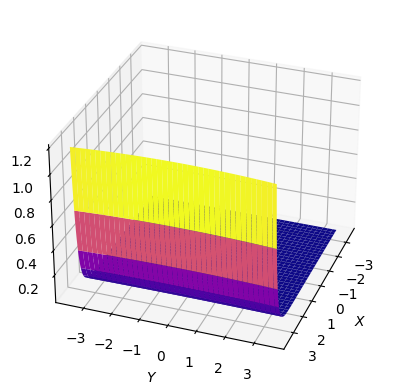

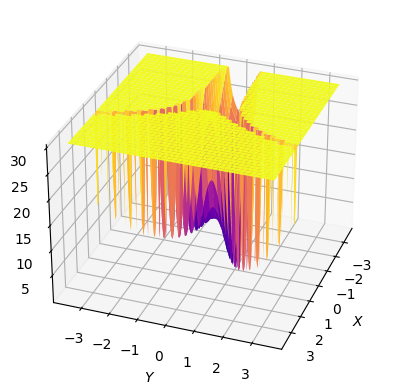

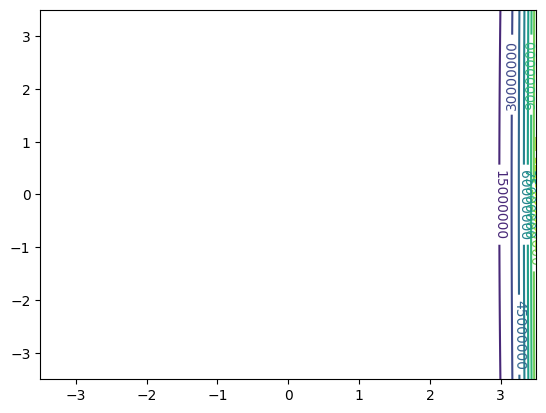

In [192]:
get_graph(f1, elev=None, azim=20, roll=None, slice=30)

<ipython-input-189-4c27815a5dd3>:41: RuntimeWarning: overflow encountered in cosh
  return (GAMMA ** 2) * np.cosh(F1(x, y)) + np.cosh(F2(x, y))
<ipython-input-189-4c27815a5dd3>:41: RuntimeWarning: overflow encountered in multiply
  return (GAMMA ** 2) * np.cosh(F1(x, y)) + np.cosh(F2(x, y))
/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


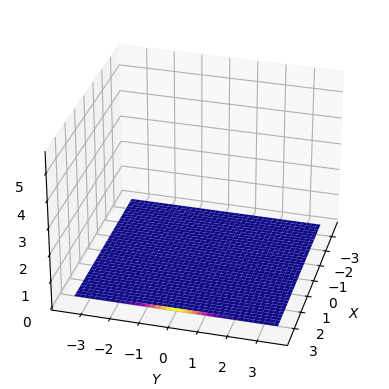

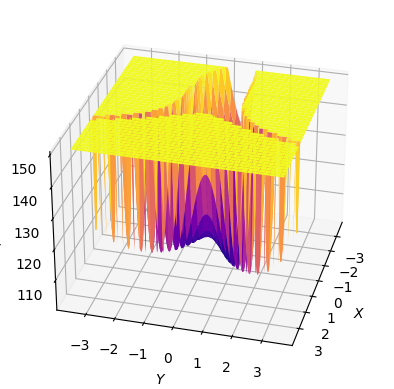

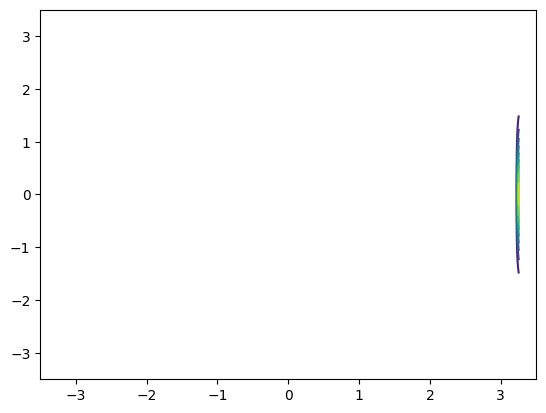

In [193]:
get_graph(f2, elev=None, azim=15, roll=None, slice=150)

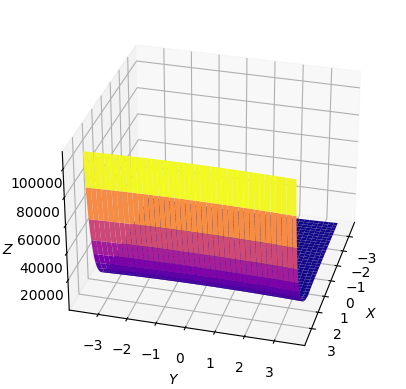

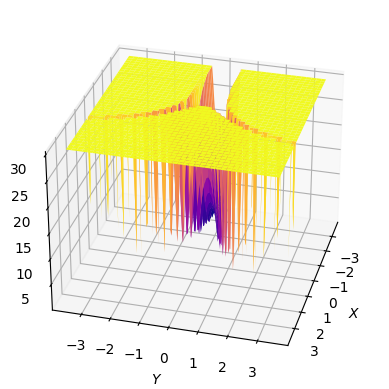

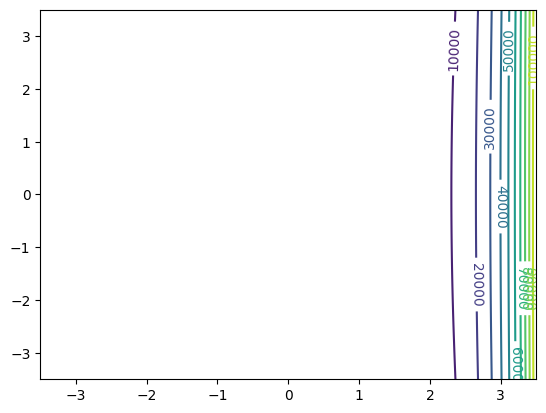

In [194]:
get_graph(f3, elev=None, azim=15, roll=None, slice=30)

In [195]:
def get_error(func, x, y, h):
    true_dx, true_dy = analytic_grad1(x, y)
    approx_dx, approx_dy = get_gradient(func, x, y, h) 
    print(f"Шаг = {h}")
    print(f"Точное значение производной по x = {true_dx}")
    print(f"Приближённое значение производной по x = {approx_dx}")
    print(f"Абсолютная погрешность = {abs(true_dx-approx_dx)}")
    print(f"Относительная погрешность = {abs((true_dx-approx_dx) / approx_dx)}\n")
    print(f"Точное значение производной по y = {true_dy}")
    print(f"Приближённое значение производной по y = {approx_dy}")
    print(f"Абсолютная погрешность = {abs(true_dy-approx_dy)}")
    print(f"Относительная погрешность = {abs((true_dy-approx_dy) / approx_dy)}\n")

    true_hxx, true_hxy, true_hyy = analytic_hes1(x, y)
    approx_hxx, approx_hxy, approx_hyy = get_hessian(func, x, y, h)
    print(f"Точная вторая производная по x = {true_hxx}")
    print(f"Численная вторая производная по x = {approx_hxx}")
    print(f"Абсолютная погрешность = {abs(true_hxx-approx_hxx)}")
    print(f"Относительная погрешность = {abs((true_hxx-approx_hxx) / approx_hxx)}\n")
    print(f"Точная вторая производная по xy = {true_hxy}")
    print(f"Численная вторая производная по xy = {approx_hxy}")
    print(f"Абсолютная погрешность = {abs(true_hxy-approx_hxy)}")
    print(f"Относительная погрешность = {abs((true_hxy-approx_hxy) / approx_hxy)}\n")
    print(f"Точная вторая производная по y = {true_hyy}")
    print(f"Численная вторая производная по y = {approx_hyy}")
    print(f"Абсолютная погрешность = {abs(true_hyy-approx_hyy)}")
    print(f"Относительная погрешность = {abs((true_hyy-approx_hyy) / approx_hyy)}\n")
    print("--------------------------------------------------")

x0, y0 = -2, -2
get_error(f1, x0, y0, 0.1)
get_error(f1, x0, y0, 0.00001)
get_error(f1, x0, y0, 0.00000001)

Шаг = 0.1
Точное значение производной по x = -117.4138995555605
Приближённое значение производной по x = -42.17607493391142
Абсолютная погрешность = 75.23782462164908
Относительная погрешность = 1.7838982110010089

Точное значение производной по y = -3189.3474888890128
Приближённое значение производной по y = -2963.513801666786
Абсолютная погрешность = 225.83368722222667
Относительная погрешность = 0.07620470236892764

Точная вторая производная по x = -718.9659324848097
Численная вторая производная по x = -69.01395420168227
Абсолютная погрешность = 649.9519782831275
Относительная погрешность = 9.417689303582671

Точная вторая производная по xy = -102.4483397333363
Численная вторая производная по xy = 33.63003714594014
Абсолютная погрешность = 136.07837687927645
Относительная погрешность = 4.046334420885526

Точная вторая производная по y = 1796.3368722222533
Численная вторая производная по y = 4328.673744444517
Абсолютная погрешность = 2532.336872222264
Относительная погрешность = 0.58

<ipython-input-195-e795e7fbe3ef>:19: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"Относительная погрешность = {abs((true_hxx-approx_hxx) / approx_hxx)}\n")
<ipython-input-195-e795e7fbe3ef>:23: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"Относительная погрешность = {abs((true_hxy-approx_hxy) / approx_hxy)}\n")
<ipython-input-195-e795e7fbe3ef>:27: RuntimeWarning: divide by zero encountered in double_scalars
  print(f"Относительная погрешность = {abs((true_hyy-approx_hyy) / approx_hyy)}\n")


In [196]:
def graph_of_searchline(func, x_lst):
    x_mesh, y_mesh, z_mesh = make_grid_data(func)
    contour_lines = plt.contour(x_mesh, y_mesh, z_mesh, levels=10)
    plt.clabel(contour_lines)

    x_list = [el[0] for el in x_lst]
    y_list = [el[1] for el in x_lst]
    plt.scatter(x_list, y_list, s=5)

def gradient_descent_const(func, x_start, alpha, max_iter, tolerance):
    x_traj = list() # список для траектории поиска

    exit_flag = -1
    iter_count = 0
    x_curr = x_start
    for i in range(max_iter):
        f_curr = func(x_curr[0], x_curr[1])
        g_curr = get_gradient(func, x_curr[0], x_curr[1], 0.00001)
        x_traj.append(x_curr)
        norm_g_curr = np.linalg.norm(g_curr)
        if norm_g_curr < tolerance:
            exit_flag = 1
            iter_count = i + 1
            break
        dx = [alpha * el for el in g_curr]
        while_count = 0
        while True:
            f_tentative = func(x_curr[0]-dx[0], x_curr[1]-dx[1])
            if f_tentative <= f_curr or while_count == 1500:
                break
            dx = [0.5 * el for el in dx]
            while_count += 1
        x_curr = [x_curr[i] - dx[i] for i in range(len(x_curr))]
    x_min = x_curr
    f_min = func(x_curr[0], x_curr[1])
    graph_of_searchline(func, x_traj)
    print(f"Начальная точка = {x_start}")
    print(f"Решение найдено в точке = {x_min}, значение функции = {f_min}")
    if exit_flag == 1:
        print(f"Решение было найдено за количество итераций = {iter_count}")
    else:
        print(f"Решение найдено по истечению максимального количества итераций = {max_iter}")

Начальная точка = [2, -2]
Решение найдено в точке = [-0.002757688803954224, 0.9972461086233921], значение функции = 3.0377516087664013e-05
Решение было найдено за количество итераций = 3367
Начальная точка = [-2, -2]
Решение найдено в точке = [-0.0027638039973185754, 0.9972400103287974], значение функции = 3.0512296493247263e-05
Решение было найдено за количество итераций = 1745


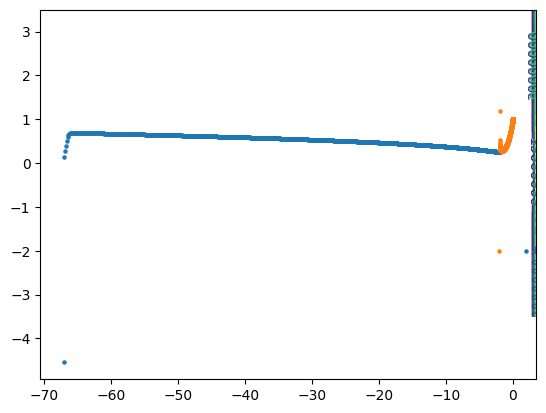

In [197]:
gradient_descent_const(f1, x_start=[2, -2],
                       alpha=0.001,
                       max_iter=15000,
                       tolerance=0.01)


gradient_descent_const(f1, x_start=[-2, -2],
                       alpha=0.001,
                       max_iter=15000,
                       tolerance=0.01)

<ipython-input-189-4c27815a5dd3>:41: RuntimeWarning: overflow encountered in cosh
  return (GAMMA ** 2) * np.cosh(F1(x, y)) + np.cosh(F2(x, y))
<ipython-input-189-4c27815a5dd3>:6: RuntimeWarning: overflow encountered in exp
  return y**2 - np.exp(2*x)
<ipython-input-189-4c27815a5dd3>:41: RuntimeWarning: overflow encountered in multiply
  return (GAMMA ** 2) * np.cosh(F1(x, y)) + np.cosh(F2(x, y))


Начальная точка = [2, -2]
Решение найдено в точке = [-0.004524950154975116, 0.9954852899621174], значение функции = 101.0000408580065
Решение было найдено за количество итераций = 2920
Начальная точка = [-2, -2]
Решение найдено в точке = [-0.004529038638565908, 0.9954812200088554], значение функции = 101.00004093179028
Решение было найдено за количество итераций = 2865


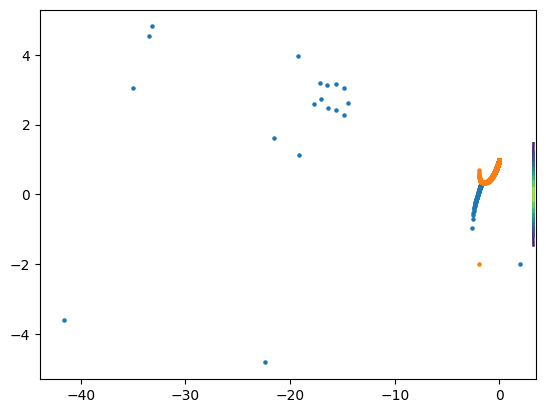

In [198]:
gradient_descent_const(f2, x_start=[2, -2],
                       alpha=0.001,
                       max_iter=15000,
                       tolerance=0.01)


gradient_descent_const(f2, x_start=[-2, -2],
                       alpha=0.001,
                       max_iter=15000,
                       tolerance=0.01)

Начальная точка = [2, -2]
Решение найдено в точке = [-4.5941541002672395, 0.01011053129443926], значение функции = 5.584044051387774
Решение найдено по истечению максимального количества итераций = 15000
Начальная точка = [-2, -2]
Решение найдено в точке = [-1.9427192570873568, -0.1433178801216159], значение функции = 3.0861565912054227
Решение найдено по истечению максимального количества итераций = 15000


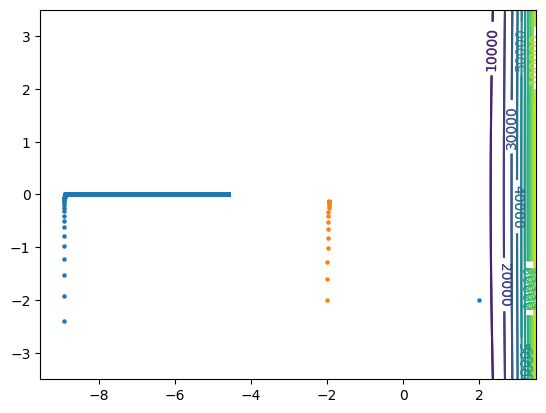

In [199]:
gradient_descent_const(f3, x_start=[2, -2],
                       alpha=0.001,
                       max_iter=15000,
                       tolerance=0.01)


gradient_descent_const(f3, x_start=[-2, -2],
                       alpha=0.001,
                       max_iter=15000,
                       tolerance=0.01)

# Метод наискорейшего спуска с использованием золотого сечения

In [200]:
def golden_ratio_search(func, x_bounds):
    x, y = x_bounds[0], x_bounds[1]
    epsilon = 0.01
    a = 0
    b = 2
    k1 = (3 - 5**0.5) / 2
    k2 = (5**0.5 - 1) / 2
    l1 = a + k1 * (b - a)
    l2 = a + k2 * (b - a)
    f1 = l1 * func(x, y)
    f2 = l2 * func(x, y)
    
    while (b - a) / 2 >= epsilon:
        if f1 < f2:
            b, l2, f2 = l2, l1, f1
            l1 = a + k1 * (b - a)
            f1 = l1 * func(x, y)
        else:
            a, l1, f1 = l1, l2, f2
            l2 = a + k2 * (b - a)
            f2 = l2 * func(x, y)

    return (a + b) / 2


def gradient_steepest_descent(func, x_bounds, max_iterations, tolerance):
    x_lst = list()

    exitflag = -1
    iterations = 0
    xk = x_bounds
    n = len(x_bounds)
    
    for i in range(max_iterations):
        f = func(xk[0], xk[1])
        g = get_gradient(func, xk[0], xk[1], 0.00001)
        x_lst.append(xk)
        ng = np.linalg.norm(g)
        
        if ng < tolerance:
            exitflag = 1
            iterations = i + 1
            break
            
        if ng > 1:
            g = [el/ng for el in g]
        
        alpha = golden_ratio_search(func, xk)
        dx = [alpha * el for el in g]
        xk = [xk[i] - dx[i] for i in range(len(xk))]
    
    xm = xk
    fv = func(xk[0], xk[1])
    
    graph_of_searchline(func, x_lst)
    
    print("Начальная точка =", x_bounds)
    print("Решение найдено в точке =", xm, ", значение функции =", fv)
    
    if exitflag == 1:
        print("Решение было найдено за количество итераций =", iterations)
    else:
        print("Решение найдено по истечению максимального количества итераций =", max_iterations)

Начальная точка = [2, -2]
Решение найдено в точке = [-0.011952635590549422, -0.9772304739380029] , значение функции = 4.0026402959829195
Решение найдено по истечению максимального количества итераций = 15000
Начальная точка = [-2, -2]
Решение найдено в точке = [-0.003008064619474198, 0.9912683531049571] , значение функции = 0.013108715485264499
Решение найдено по истечению максимального количества итераций = 15000


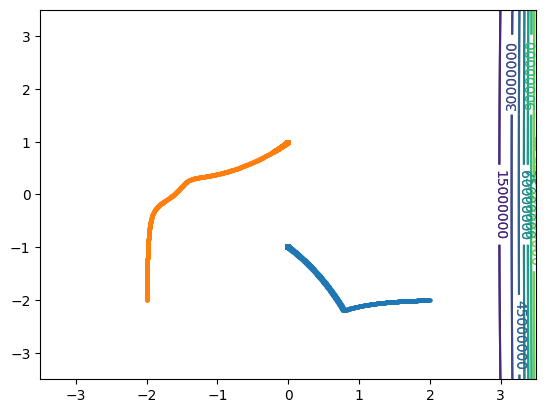

In [201]:
gradient_steepest_descent(f1, x_bounds=[2, -2],
                          max_iterations=15000,
                          tolerance=0.01)

gradient_steepest_descent(f1, x_bounds=[-2, -2],
                          max_iterations=15000,
                          tolerance=0.01)

<ipython-input-189-4c27815a5dd3>:41: RuntimeWarning: overflow encountered in cosh
  return (GAMMA ** 2) * np.cosh(F1(x, y)) + np.cosh(F2(x, y))
<ipython-input-189-4c27815a5dd3>:41: RuntimeWarning: overflow encountered in multiply
  return (GAMMA ** 2) * np.cosh(F1(x, y)) + np.cosh(F2(x, y))


Начальная точка = [2, -2]
Решение найдено в точке = [-0.015409203514078864, -0.9810877354148594] , значение функции = 103.75204729423774
Решение найдено по истечению максимального количества итераций = 3000
Начальная точка = [-2, -2]
Решение найдено в точке = [-0.008740603682745266, 0.9970341659735174] , значение функции = 101.00657391896871
Решение найдено по истечению максимального количества итераций = 3000


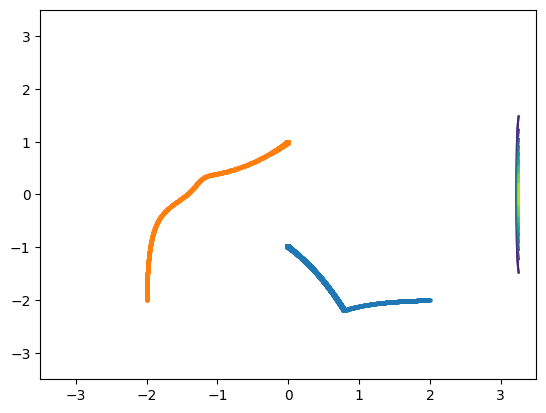

In [202]:
gradient_steepest_descent(f2, x_bounds=[2, -2],
                          max_iterations=3000,
                          tolerance=0.01)

gradient_steepest_descent(f2, x_bounds=[-2, -2],
                          max_iterations=3000,
                          tolerance=0.01)

Начальная точка = [2, -2]
Решение найдено в точке = [0.7518284457149236, -2.1203259172525653] , значение функции = 2.6011103083441087
Решение найдено по истечению максимального количества итераций = 3000
Начальная точка = [-2, -2]
Решение найдено в точке = [-1.5348949645574064, -0.21921310596848959] , значение функции = 2.9164558918738295
Решение найдено по истечению максимального количества итераций = 3000


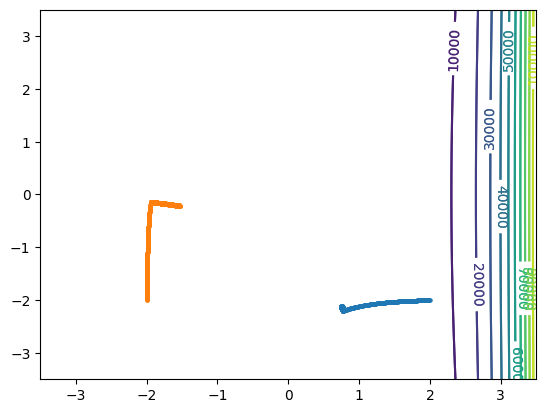

In [203]:
gradient_steepest_descent(f3, x_bounds=[2, -2],
                          max_iterations=3000,
                          tolerance=0.01)

gradient_steepest_descent(f3, x_bounds=[-2, -2],
                          max_iterations=3000,
                          tolerance=0.01)